<a href="https://colab.research.google.com/github/kishore145/intersting-problems/blob/master/csse_covid_19_daily_reports_us_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Objective


1.   Find all the metrics or analysis from the data set, please do go as detailed as possible. 

---  

2.   After submission of the above analysis, kindly do the below mentioned set of analysis as well.  
*   Graphing the number of confirmed cases, active cases, deaths, recoveries, mortality rate (CFR), and recovery rate  
*   World Daily Increases in confirmed cases, confirmed deaths, confirmed recoveries (Graph)  
*   Log of cases over time, log of death over time, log of corona recoveries over time
*   Country Specific Graphs
*   Country specific Cases, death, recoveries graph
*   Do a prediction for confirmed cases over worldwide (you can use external factors from the internet, do mention the source)
*   Prediction of Recoveries, Deaths as well 

All graphs should contain Pie Chart, Bar Chart, Normal Graph too


---

# Import dependencies

In [108]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Display up to 60 columns of a dataframe
pd.set_option('display.max_columns', 30)

# Set default font size
plt.rcParams['font.size'] = 10

# Internal ipython tool for setting figure size
from IPython.core.pylabtools import figsize

# Seaborn for visualization
import seaborn as sns
sns.set(font_scale = 1)


# Read Data Files

In [109]:
# Set path to files:
base_path = ''

In [110]:
# Read US case details
us_cases = pd.read_csv(base_path + '07-12-2020.csv')
us_cases.head()

,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Testing_Rate,Hospitalization_Rate
0,Alabama,US,2020-07-13 04:43:16,32.3182,-86.9023,53587,1121,25783.0,26683.0,1,1092.901859,511506.0,6745.0,2.091925,84000001,USA,10432.117083,12.587008
1,Alaska,US,2020-07-13 04:43:16,61.3707,-152.4044,1479,17,615.0,847.0,2,202.174849,145475.0,NaN,1.149425,84000002,USA,19885.994710,NaN
2,American Samoa,US,2020-07-13 04:43:16,-14.2710,-170.1320,0,0,NaN,0.0,60,0.000000,816.0,NaN,NaN,16,ASM,1466.544455,NaN
3,Arizona,US,2020-07-13 04:43:16,33.7298,-111.4312,122467,2237,14829.0,105401.0,4,1682.535535,696172.0,5795.0,1.826615,84000004,USA,9564.487807,4.731887
4,Arkansas,US,2020-07-13 04:43:16,34.9697,-92.3731,28367,321,21591.0,6455.0,5,939.988150,382402.0,1822.0,1.131597,84000005,USA,12671.532015,6.422956


Data looks like it's taken from JHU CSSE COVID-19 Dataset  
For field defenitions and details, refer : https://github.com/CSSEGISandData/COVID-19/tree/master/csse_covid_19_data#jhu-csse-covid-19-dataset

## [USA daily state reports (csse_covid_19_daily_reports_us)](https://github.com/CSSEGISandData/COVID-19/tree/master/csse_covid_19_data/csse_covid_19_daily_reports_us)

This table contains an aggregation of each USA State level data.

### File naming convention
MM-DD-YYYY.csv in UTC.

### Field description
* <b>Province_State</b> - The name of the State within the USA.
* <b>Country_Region</b> - The name of the Country (US).
* <b>Last_Update</b> - The most recent date the file was pushed.
* <b>Lat</b> - Latitude.
* <b>Long_</b> - Longitude.
* <b>Confirmed</b> - Aggregated case count for the state.
* <b>Deaths</b> - Aggregated death toll for the state.
* <b>Recovered</b> - Aggregated Recovered case count for the state.
* <b>Active</b> - Aggregated confirmed cases that have not been resolved (Active cases = total cases - total recovered - total deaths).
* <b>FIPS</b> - Federal Information Processing Standards code that uniquely identifies counties within the USA.
* <b>Incident_Rate</b> - cases per 100,000 persons.
* <b>People_Tested</b> - Total number of people who have been tested.
* <b>People_Hospitalized</b> - Total number of people hospitalized.
* <b>Mortality_Rate</b> - Number recorded deaths * 100/ Number confirmed cases.
* <b>UID</b> - Unique Identifier for each row entry. 
* <b>ISO3</b> - Officialy assigned country code identifiers.
* <b>Testing_Rate</b> - Total test results per 100,000 persons. The "total test results" are equal to "Total test results (Positive + Negative)" from [COVID Tracking Project](https://covidtracking.com/).
* <b>Hospitalization_Rate</b> - US Hospitalization Rate (%): = Total number hospitalized / Number cases. The "Total number hospitalized" is the "Hospitalized – Cumulative" count from [COVID Tracking Project](https://covidtracking.com/). The "hospitalization rate" and "Total number hospitalized" is only presented for those states which provide cumulative hospital data.

### Update frequency
* Once per day between 04:45 and 05:15 UTC.

### Data sources
Refer to the [mainpage](https://github.com/CSSEGISandData/COVID-19).

## Let's Look at US Covid-19 data provided at state level  


# Data Clearning

In [111]:
# Quick review of the data 
print(f'Number of rows in us_cases: {len(us_cases)}')
us_cases.head(10)

Number of rows in us_cases: 58


,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Testing_Rate,Hospitalization_Rate
0,Alabama,US,2020-07-13 04:43:16,32.3182,-86.9023,53587,1121,25783.0,26683.0,1,1092.901859,511506.0,6745.0,2.091925,84000001,USA,10432.117083,12.587008
1,Alaska,US,2020-07-13 04:43:16,61.3707,-152.4044,1479,17,615.0,847.0,2,202.174849,145475.0,NaN,1.149425,84000002,USA,19885.994710,NaN
2,American Samoa,US,2020-07-13 04:43:16,-14.2710,-170.1320,0,0,NaN,0.0,60,0.000000,816.0,NaN,NaN,16,ASM,1466.544455,NaN
3,Arizona,US,2020-07-13 04:43:16,33.7298,-111.4312,122467,2237,14829.0,105401.0,4,1682.535535,696172.0,5795.0,1.826615,84000004,USA,9564.487807,4.731887
4,Arkansas,US,2020-07-13 04:43:16,34.9697,-92.3731,28367,321,21591.0,6455.0,5,939.988150,382402.0,1822.0,1.131597,84000005,USA,12671.532015,6.422956
5,California,US,2020-07-13 04:43:16,36.1162,-119.6816,324543,7051,NaN,317492.0,6,821.373680,5406599.0,NaN,2.172593,84000006,USA,13683.358185,NaN
6,Colorado,US,2020-07-13 04:43:16,39.0598,-105.3111,36895,1725,4749.0,30421.0,8,640.678788,392103.0,5885.0,4.675430,84000008,USA,6808.837912,15.950671
7,Connecticut,US,2020-07-13 04:43:16,41.5978,-72.7554,47287,4348,8351.0,34588.0,9,1326.316787,558209.0,10552.0,9.194916,84000009,USA,15656.776018,22.314801
8,Delaware,US,2020-07-13 04:43:16,39.3185,-75.5071,12804,517,7120.0,5167.0,10,1314.897655,137409.0,NaN,4.037801,84000010,USA,14111.119327,NaN
9,Diamond Princess,US,2020-07-13 04:43:16,NaN,NaN,49,0,NaN,49.0,88888,NaN,NaN,NaN,0.000000,84088888,USA,NaN,NaN


In [112]:
us_cases.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58 entries, 0 to 57
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Province_State        58 non-null     object 
 1   Country_Region        58 non-null     object 
 2   Last_Update           58 non-null     object 
 3   Lat                   56 non-null     float64
 4   Long_                 56 non-null     float64
 5   Confirmed             58 non-null     int64  
 6   Deaths                58 non-null     int64  
 7   Recovered             48 non-null     float64
 8   Active                58 non-null     float64
 9   FIPS                  58 non-null     int64  
 10  Incident_Rate         56 non-null     float64
 11  People_Tested         56 non-null     float64
 12  People_Hospitalized   37 non-null     float64
 13  Mortality_Rate        57 non-null     float64
 14  UID                   58 non-null     int64  
 15  ISO3                  58 

In [113]:
# Below set of columns could be converted to int64 from float as they represent whole numbers
#  #   Column                Non-Null Count  Dtype  
#  7   Recovered             48 non-null     float64
#  8   Active                58 non-null     float64
# 11  People_Tested          56 non-null     float64
# 12  People_Hospitalized    37 non-null     float64

# Due to pandas storing missing values as Nan which can be converted only to float
# and we want to analyze null values down the line, we will not be doing data type conversion 
# at this point.

In [114]:
# Function to convert column datatype
def cconvert(df, ctype, columns):
  for col in list(df.columns):
    # Select columns that should be changed
    if (col in columns):
      # Convert the data type to passed data type
      df[col] = df[col].astype(ctype)

In [115]:
us_cases.describe()

,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,Testing_Rate,Hospitalization_Rate
count,56.000000,56.000000,58.000000,58.000000,48.000000,58.000000,58.000000,56.000000,5.600000e+01,37.000000,57.000000,5.800000e+01,56.000000,37.000000
mean,36.840089,-85.206614,56981.758621,2331.120690,20965.125000,37300.189655,3288.086207,812.052441,7.193246e+05,7125.702703,3.321810,7.676194e+07,11606.026548,10.635990
std,10.887035,49.754449,82687.271523,4881.241293,27714.896166,69789.803064,17408.350591,502.766791,1.017488e+06,14929.232437,2.218287,2.378302e+07,4352.235379,4.294160
min,-14.271000,-170.132000,0.000000,0.000000,19.000000,0.000000,1.000000,0.000000,8.160000e+02,4.000000,0.000000,1.600000e+01,1466.544455,4.292397
25%,34.594600,-101.165775,6415.250000,110.250000,2538.750000,986.500000,18.250000,442.427333,1.364040e+05,1180.000000,1.649602,8.400001e+07,8736.204959,6.870028
50%,39.061850,-87.944200,28123.500000,683.000000,7735.500000,9858.000000,32.500000,774.144945,4.119060e+05,3250.000000,2.568093,8.400003e+07,10743.100941,10.401713
75%,42.361650,-76.970625,69400.500000,2629.250000,29036.000000,28791.250000,47.750000,1106.592729,8.341048e+05,7527.000000,4.539797,8.400004e+07,13735.422459,12.587008
max,61.370700,145.673900,401706.000000,32350.000000,132638.000000,317492.000000,99999.000000,2064.948417,5.406599e+06,89995.000000,9.194916,8.410000e+07,24022.311391,22.403200


In [116]:
# Function to calculate missing values by column picked from stack overflow
# https://stackoverflow.com/questions/26266362/how-to-count-the-nan-values-in-a-column-in-pandas-dataframe/39734251#39734251
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [117]:
missing_values_table(us_cases)

Your selected dataframe has 18 columns.
There are 9 columns that have missing values.


,Missing Values,% of Total Values
People_Hospitalized,21,36.2
Hospitalization_Rate,21,36.2
Recovered,10,17.2
Lat,2,3.4
Long_,2,3.4
Incident_Rate,2,3.4
People_Tested,2,3.4
Testing_Rate,2,3.4
Mortality_Rate,1,1.7


Looking at the missing values column, it's evident that People Hospilatized and Hospitalization rate are not provided by all states and hence is not a reliable measure to do any predictions or analysis.
  

Further, we cannot impute recovered case count (very important metric) from other case counts like Active, Deaths and Confirmed since Active case count is a calculated field as mentioned below.  

* Active - Aggregated confirmed cases that have not been resolved (Active cases = total cases - total recovered - total deaths).

In [118]:
# Looking at raw data and FIPS code, Diamond Princess and Grand Princess should be taken seperately
cruises = us_cases[us_cases['FIPS'].isin([88888,99999])]
cruises

,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Testing_Rate,Hospitalization_Rate
9,Diamond Princess,US,2020-07-13 04:43:16,NaN,NaN,49,0,NaN,49.0,88888,NaN,NaN,NaN,0.000000,84088888,USA,NaN,NaN
13,Grand Princess,US,2020-07-13 04:43:16,NaN,NaN,103,3,NaN,100.0,99999,NaN,NaN,NaN,2.912621,84099999,USA,NaN,NaN


In [119]:
# Dropping two cruises from US cases for analysis
us_cases.drop([9,13], inplace=True)
us_cases.head(10)

,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Testing_Rate,Hospitalization_Rate
0,Alabama,US,2020-07-13 04:43:16,32.3182,-86.9023,53587,1121,25783.0,26683.0,1,1092.901859,511506.0,6745.0,2.091925,84000001,USA,10432.117083,12.587008
1,Alaska,US,2020-07-13 04:43:16,61.3707,-152.4044,1479,17,615.0,847.0,2,202.174849,145475.0,NaN,1.149425,84000002,USA,19885.994710,NaN
2,American Samoa,US,2020-07-13 04:43:16,-14.2710,-170.1320,0,0,NaN,0.0,60,0.000000,816.0,NaN,NaN,16,ASM,1466.544455,NaN
3,Arizona,US,2020-07-13 04:43:16,33.7298,-111.4312,122467,2237,14829.0,105401.0,4,1682.535535,696172.0,5795.0,1.826615,84000004,USA,9564.487807,4.731887
4,Arkansas,US,2020-07-13 04:43:16,34.9697,-92.3731,28367,321,21591.0,6455.0,5,939.988150,382402.0,1822.0,1.131597,84000005,USA,12671.532015,6.422956
5,California,US,2020-07-13 04:43:16,36.1162,-119.6816,324543,7051,NaN,317492.0,6,821.373680,5406599.0,NaN,2.172593,84000006,USA,13683.358185,NaN
6,Colorado,US,2020-07-13 04:43:16,39.0598,-105.3111,36895,1725,4749.0,30421.0,8,640.678788,392103.0,5885.0,4.675430,84000008,USA,6808.837912,15.950671
7,Connecticut,US,2020-07-13 04:43:16,41.5978,-72.7554,47287,4348,8351.0,34588.0,9,1326.316787,558209.0,10552.0,9.194916,84000009,USA,15656.776018,22.314801
8,Delaware,US,2020-07-13 04:43:16,39.3185,-75.5071,12804,517,7120.0,5167.0,10,1314.897655,137409.0,NaN,4.037801,84000010,USA,14111.119327,NaN
10,District of Columbia,US,2020-07-13 04:43:16,38.8974,-77.0268,10847,568,1737.0,8542.0,11,1536.948689,126883.0,NaN,5.236471,84000011,USA,17978.488103,NaN


# Exploratory Data Analysis

Text(0.5, 1.0, 'Covid Confrimed Distribution')

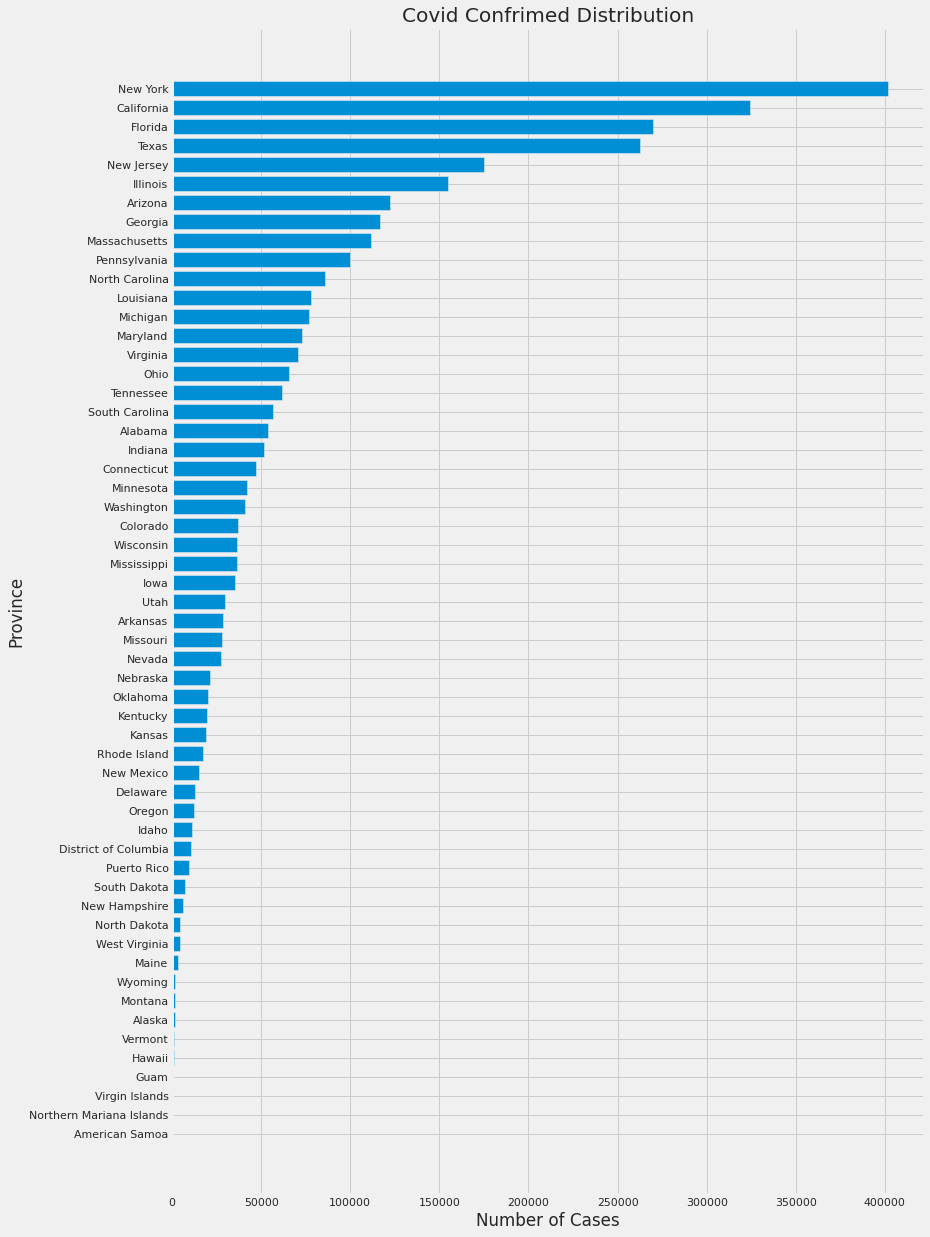

In [120]:
# Plotting Covid Confirmed Distribution
figsize(12, 20)

# Bar chart of Covid Confirmed Cases
plt.style.use('fivethirtyeight')
Xy = us_cases[['Province_State', 'Confirmed']].copy()

Xy.sort_values(by = 'Confirmed', na_position='first', ascending = True, inplace = True)
plt.barh(Xy['Province_State'], Xy['Confirmed'] )
plt.xlabel('Number of Cases'); plt.ylabel('Province'); 
plt.title('Covid Confrimed Distribution')

In [121]:
Xy.sort_values(by = 'Confirmed', na_position='first', ascending = False, inplace = True)

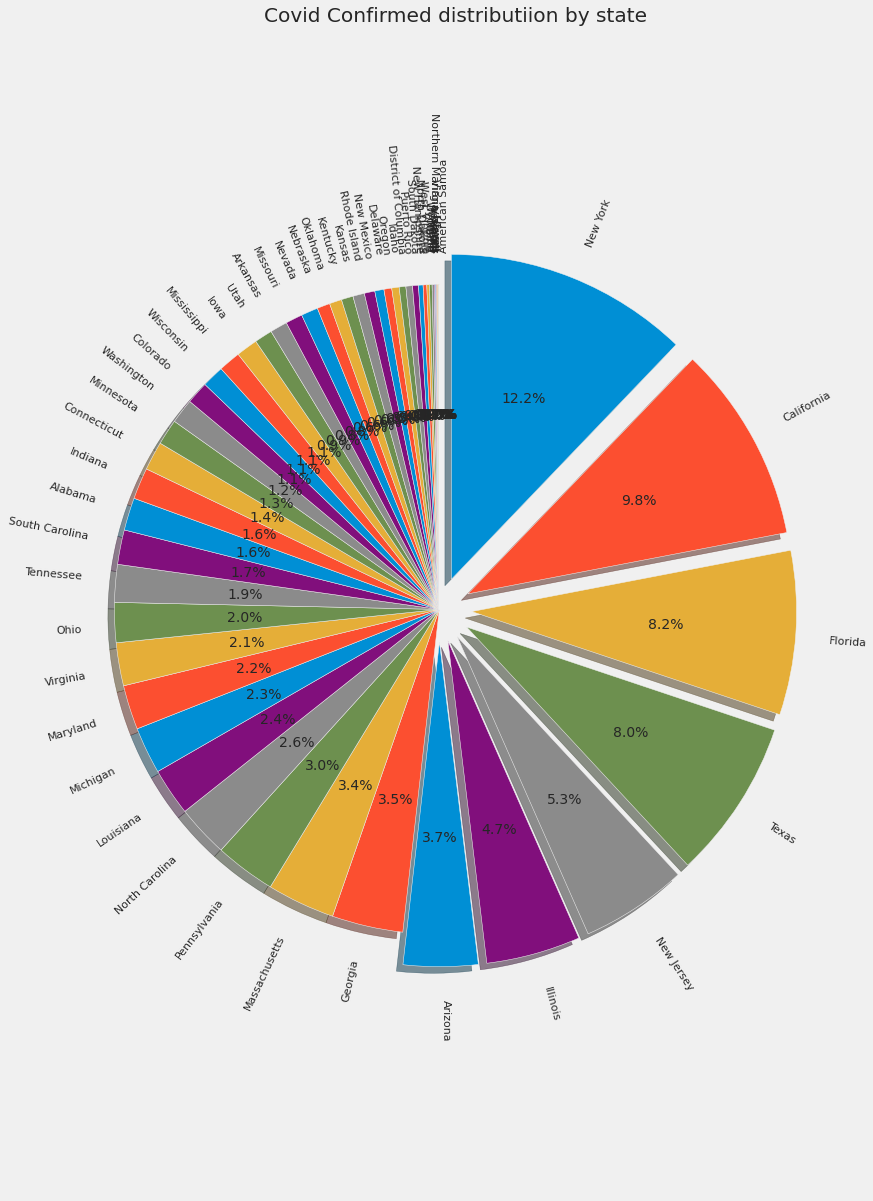

In [122]:
# Pie chart, where the slices will be ordered and plotted clockwise:
labels = Xy['Province_State']
sizes = Xy['Confirmed']

explode = [0.1 if i < 7 else 0 for i in range(len(Xy))]

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode = explode,  labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90, rotatelabels = True, counterclock = False)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax1.set_title('Covid Confirmed distributiion by state')
plt.show()

As is evident from above two graphs, 7 states account for more than 50% of confirmed cases.

Text(0.5, 1.0, 'Covid Recovered Distribution')

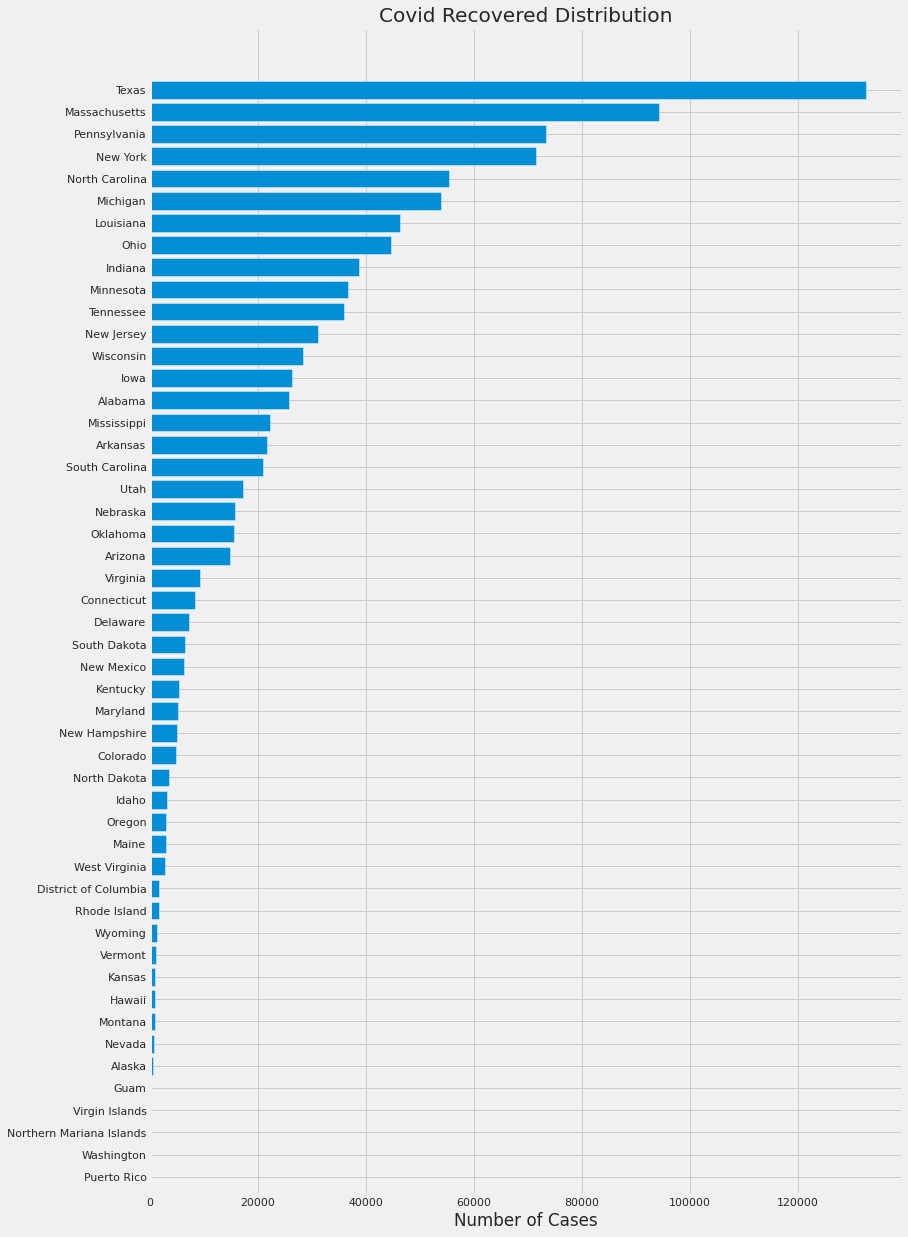

In [123]:
figsize(12, 20)

# Bar chart of Covid Recovered Cases
plt.style.use('fivethirtyeight')
Xy = us_cases[['Province_State', 'Recovered']].copy()

Xy.sort_values(by = 'Recovered', na_position='first', ascending = True, inplace = True)
plt.barh(Xy['Province_State'], Xy['Recovered'] )
plt.xlabel('Number of Cases')
plt.title('Covid Recovered Distribution')

In [124]:
Xy.sort_values(by = 'Recovered', na_position='first', ascending = False, inplace = True)

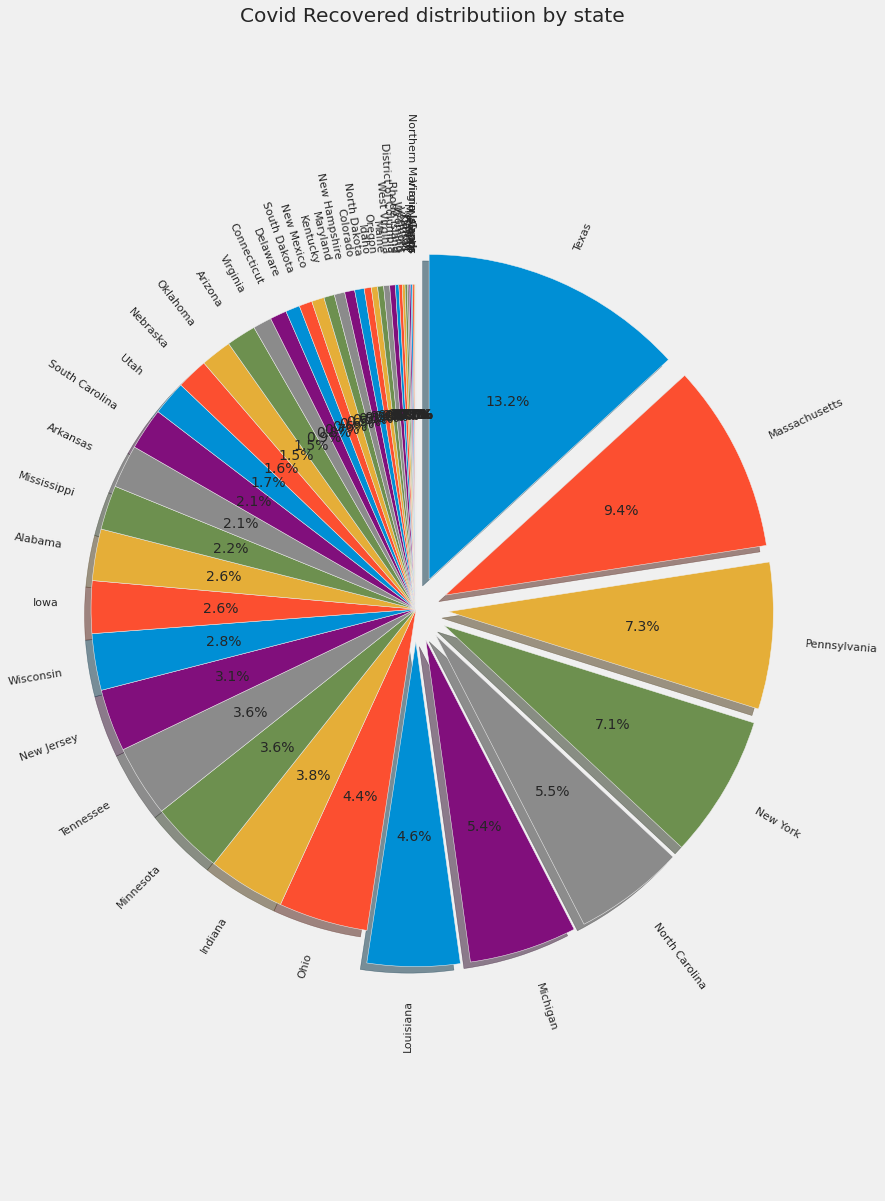

In [125]:
# Pie chart, where the slices will be ordered and plotted clockwise:
Xy.dropna(inplace = True)
labels = Xy['Province_State']
sizes = Xy['Recovered']

explode = [0.1 if i < 7 else 0 for i in range(len(Xy))]
#print(explode)

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode = explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90, rotatelabels = True, counterclock = False)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax1.set_title('Covid Recovered distributiion by state')
plt.show()

The graph follows similar trajectory as confirmed cases barring few states like California, Florida, Illinois, Georgia etc. that doesn't provide data for Reocovered patients. Let's look at original data set and confirm if the intuiton is right. 

In [126]:
us_cases[us_cases['Recovered'].isnull( )].sort_values('Confirmed', ascending = False)

,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Testing_Rate,Hospitalization_Rate
5,California,US,2020-07-13 04:43:16,36.1162,-119.6816,324543,7051,NaN,317492.0,6,821.373680,5406599.0,NaN,2.172593,84000006,USA,13683.358185,NaN
11,Florida,US,2020-07-13 04:43:16,27.7663,-81.6868,269811,4242,NaN,265569.0,12,1256.235701,2574007.0,18590.0,1.572212,84000012,USA,11984.535428,6.890008
17,Illinois,US,2020-07-13 04:43:16,40.3495,-88.9861,155048,7388,NaN,147660.0,17,1223.565263,1984114.0,NaN,4.764976,84000017,USA,15657.686452,NaN
12,Georgia,US,2020-07-13 04:43:16,33.0406,-83.6431,116935,3003,NaN,113932.0,13,1101.350111,1083416.0,13259.0,2.568093,84000013,USA,10204.133338,11.338778
54,Washington,US,2020-07-13 04:43:16,47.4009,-121.4905,40656,1438,NaN,39218.0,53,533.901133,668466.0,4662.0,3.536993,84000053,USA,8778.403058,11.466942
29,Missouri,US,2020-07-13 04:43:16,38.4561,-92.2884,27880,1092,NaN,26788.0,29,454.261948,485508.0,NaN,3.916786,84000029,USA,7910.610112,NaN
44,Puerto Rico,US,2020-07-13 04:43:16,18.2208,-66.5901,9654,167,NaN,9487.0,72,329.105259,202340.0,NaN,1.729853,630,PRI,6897.778966,NaN
2,American Samoa,US,2020-07-13 04:43:16,-14.2710,-170.1320,0,0,NaN,0.0,60,0.000000,816.0,NaN,NaN,16,ASM,1466.544455,NaN


Text(0.5, 1.0, 'Covid Deaths Distribution')

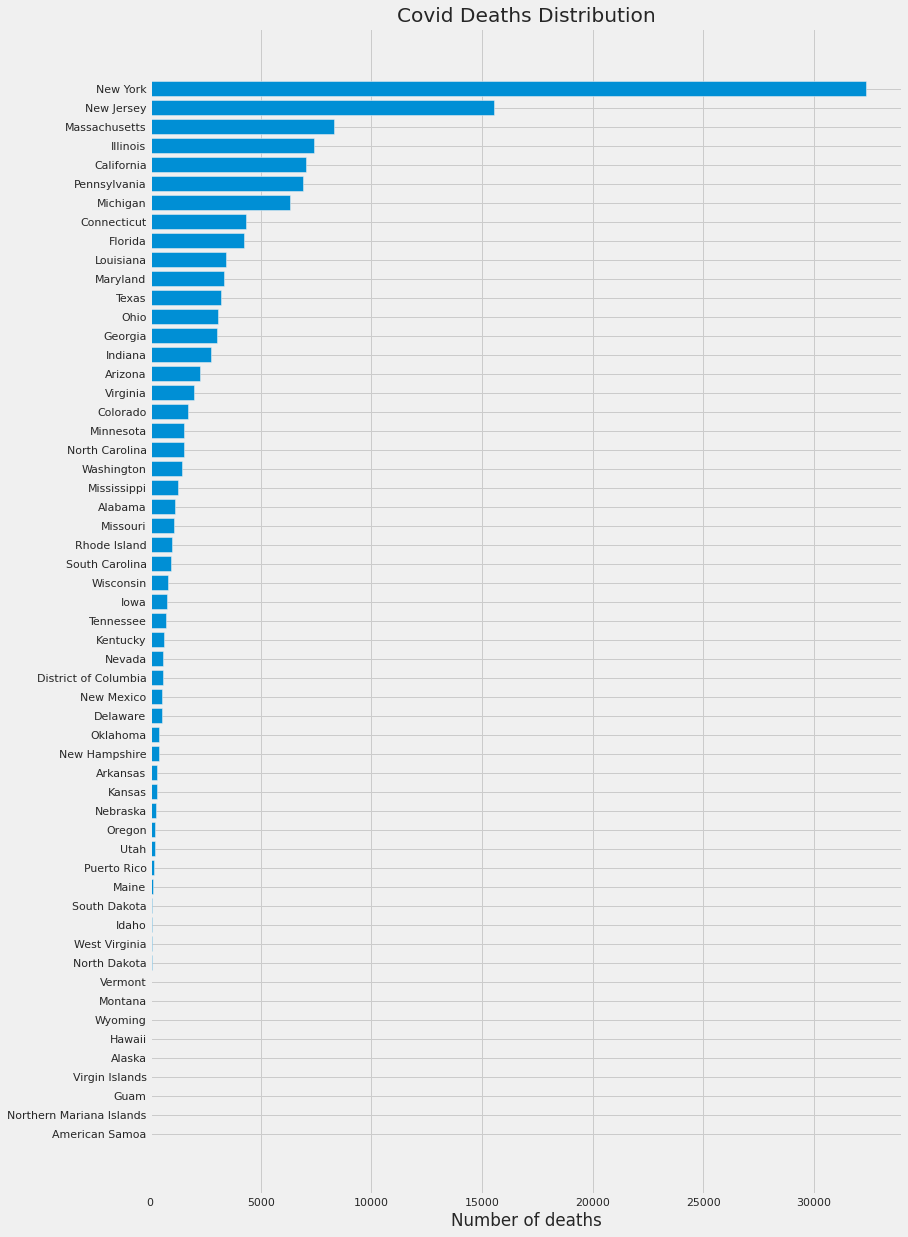

In [127]:
# Plotting Deaths
figsize(12, 20)

# Bar chart of Covid Deaths 
plt.style.use('fivethirtyeight')
Xy = us_cases[['Province_State', 'Deaths']].copy()
#print(Xy.head())
Xy.sort_values(by = 'Deaths', na_position='first', ascending = True, inplace = True)
plt.barh(Xy['Province_State'], Xy['Deaths'] )
plt.xlabel('Number of deaths') 
plt.title('Covid Deaths Distribution')

In [128]:
Xy.sort_values(by = 'Deaths', na_position='first', ascending = False, inplace = True)

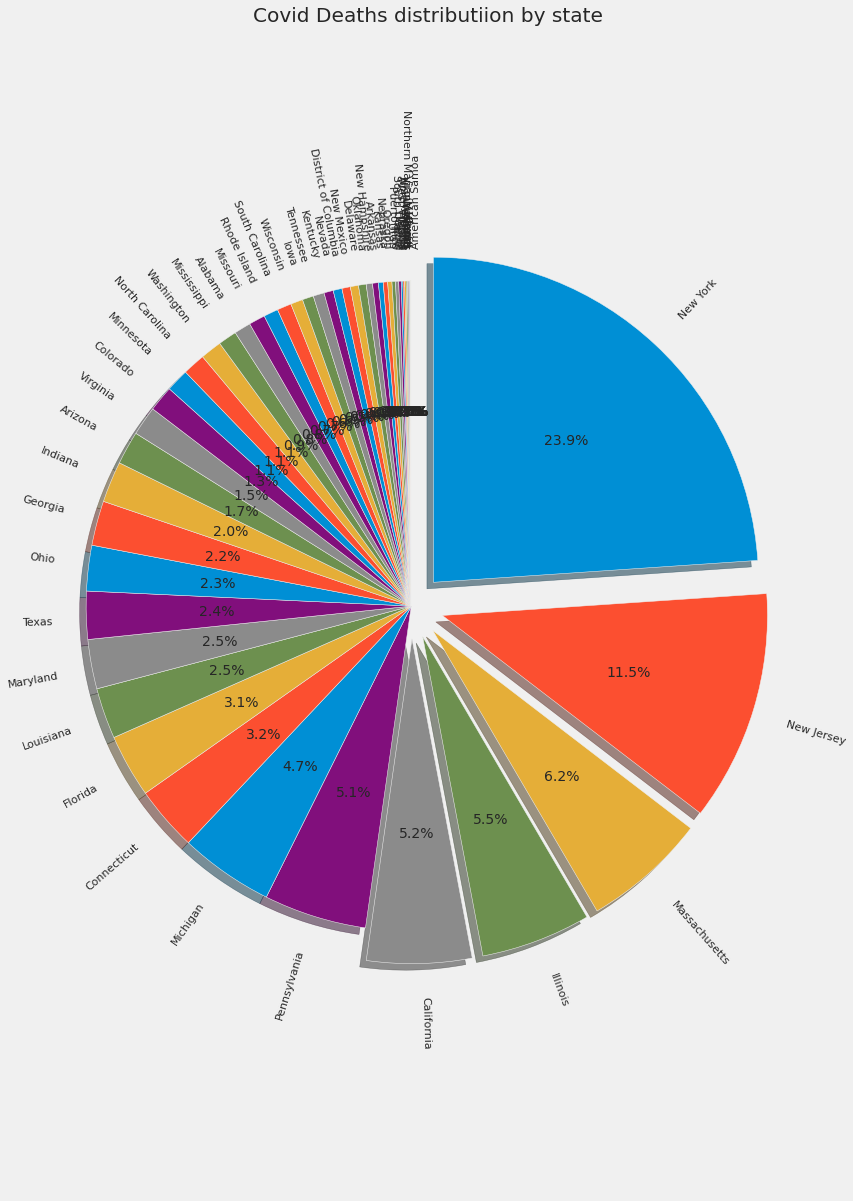

In [129]:
# Pie chart, where the slices will be ordered and plotted clockwise:
Xy.dropna(inplace = True)
labels = Xy['Province_State']
sizes = Xy['Deaths']

explode = [0.1 if i < 5 else 0 for i in range(len(Xy))]
#print(explode)

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode = explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90, rotatelabels = True, counterclock = False)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax1.set_title('Covid Deaths distributiion by state')
plt.show()

New york and New Jersey bore the burnt of the infecction as is evident from their death toll. More than 50% of covid deaths are centered around 5 states of New York, New Jersey, Massachusetts, Illinois and Calofornia

Text(0.5, 1.0, 'Covid Active Cases Distribution')

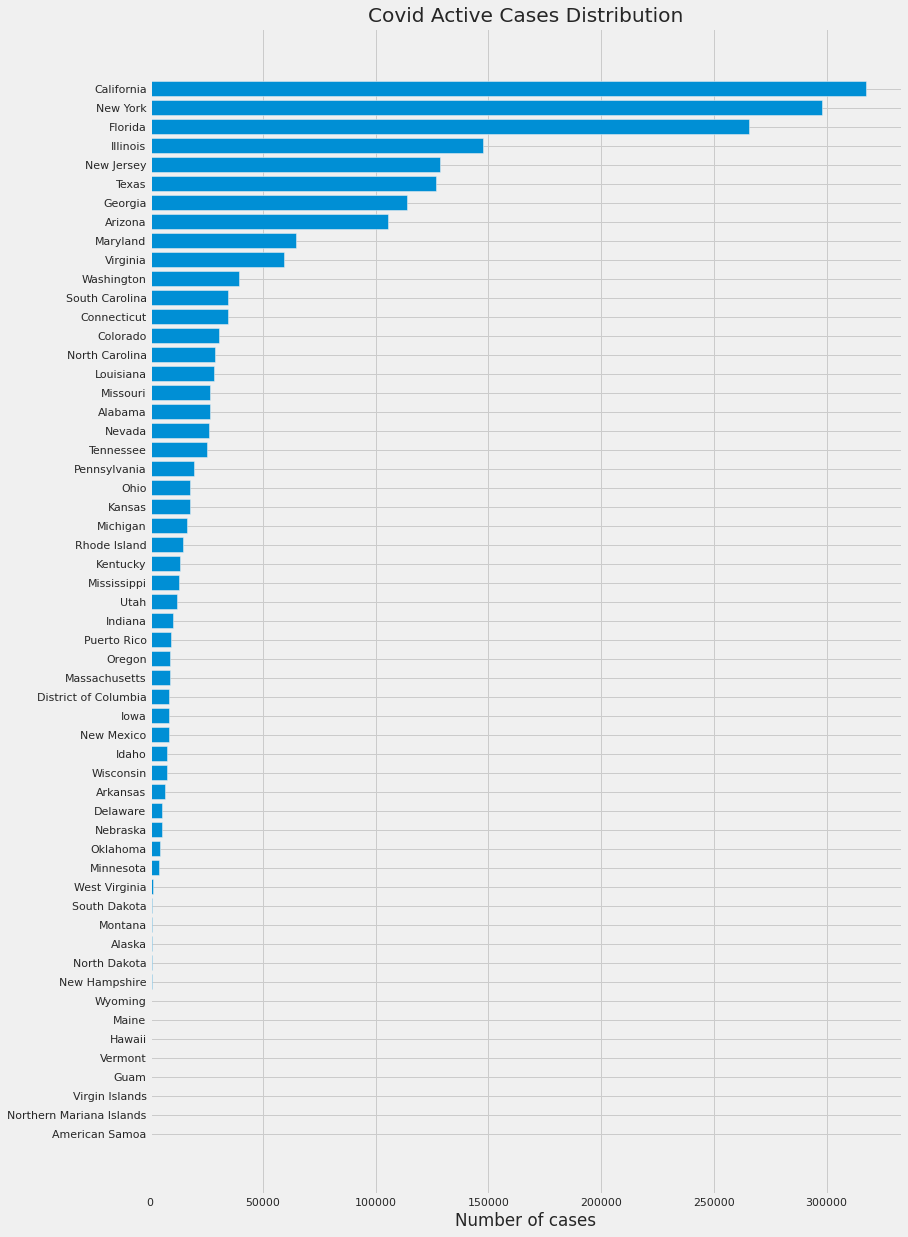

In [130]:
# Plotting Active cases
figsize(12, 20)

# Bar chart of Covid Active Cases 
plt.style.use('fivethirtyeight')
Xy = us_cases[['Province_State', 'Active']].copy()

Xy.sort_values(by = 'Active', na_position='first', ascending = True, inplace = True)
plt.barh(Xy['Province_State'], Xy['Active'] )
plt.xlabel('Number of cases') 
plt.title('Covid Active Cases Distribution')

In [131]:
Xy.sort_values(by = 'Active', na_position='first', ascending = False, inplace = True)

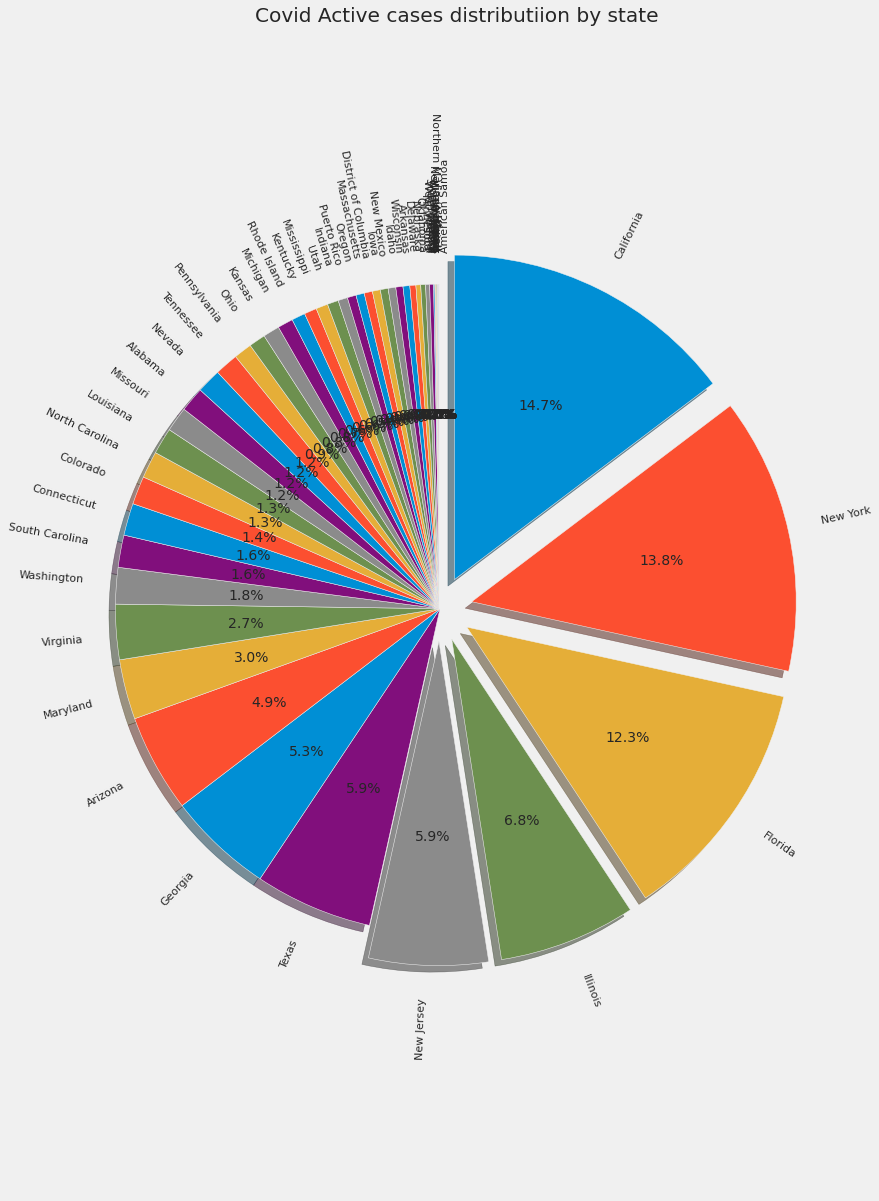

In [132]:
# Pie chart, where the slices will be ordered and plotted clockwise:
Xy.dropna(inplace = True)
labels = Xy['Province_State']
sizes = Xy['Active']

explode = [0.1 if i < 5 else 0 for i in range(len(Xy))]
#print(explode)

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode = explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90, rotatelabels = True, counterclock = False)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax1.set_title('Covid Active cases distributiion by state')
plt.show()

Same story follows for Active covid cases where top 5 states account for more than 50% of active covid cases as well. 

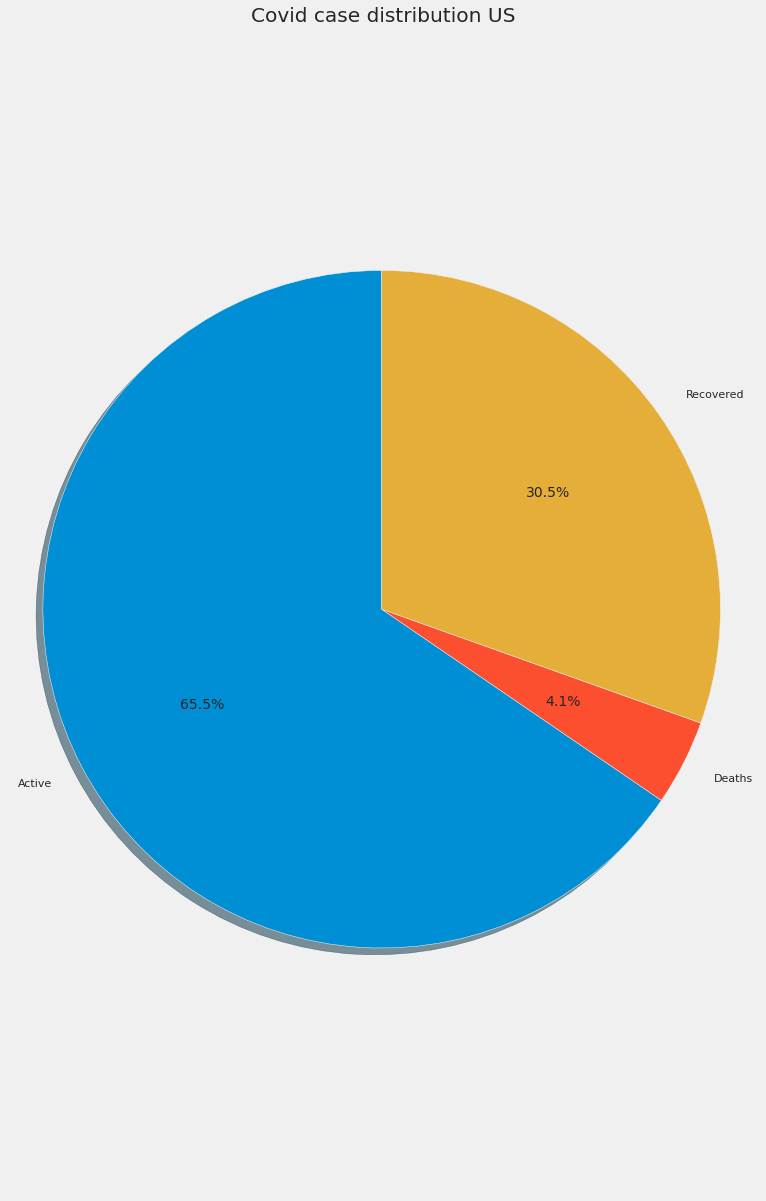

In [133]:
# Looking at overall case values for US
covid_cases = us_cases.sum(numeric_only=True).get(key = ['Active', 'Deaths', 'Recovered'])

fig1, ax1 = plt.subplots()
ax1.pie(covid_cases.array, labels=covid_cases.index, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

ax1.set_title('Covid case distribution US')
plt.show()

Looking at the overall data, it is evident that the pandemic is still very much active with 65% cases still active with recovered cases only at 30.5% and overall mortality rate is quite high at 4.1%.  

These metrics are overall and mortality rate may have come down in recent months which will be evident when we do a time series analysis on the data. 

Let's look at other relevant metrics and see how they change per state. 

* <b>Incident_Rate</b> - cases per 100,000 persons.
* <b>People_Tested</b> - Total number of people who have been tested.

* <b>Mortality_Rate</b> - Number recorded deaths * 100/ Number confirmed cases.
* <b>Testing_Rate</b> - Total test results per 100,000 persons. The "total test results" are equal to "Total test results (Positive + Negative)" from [COVID Tracking Project](https://covidtracking.com/).

Below two metrics are not available for all states and will be considered last. 
* <b>People_Hospitalized</b> - Total number of people hospitalized.
* <b>Hospitalization_Rate</b> - US Hospitalization Rate (%): = Total number hospitalized / Number cases. The "Total number hospitalized" is the "Hospitalized – Cumulative" count from [COVID Tracking Project](https://covidtracking.com/). The "hospitalization rate" and "Total number hospitalized" is only presented for those states which provide cumulative hospital data.

Text(0.5, 1.0, 'Covid Tests Distribution')

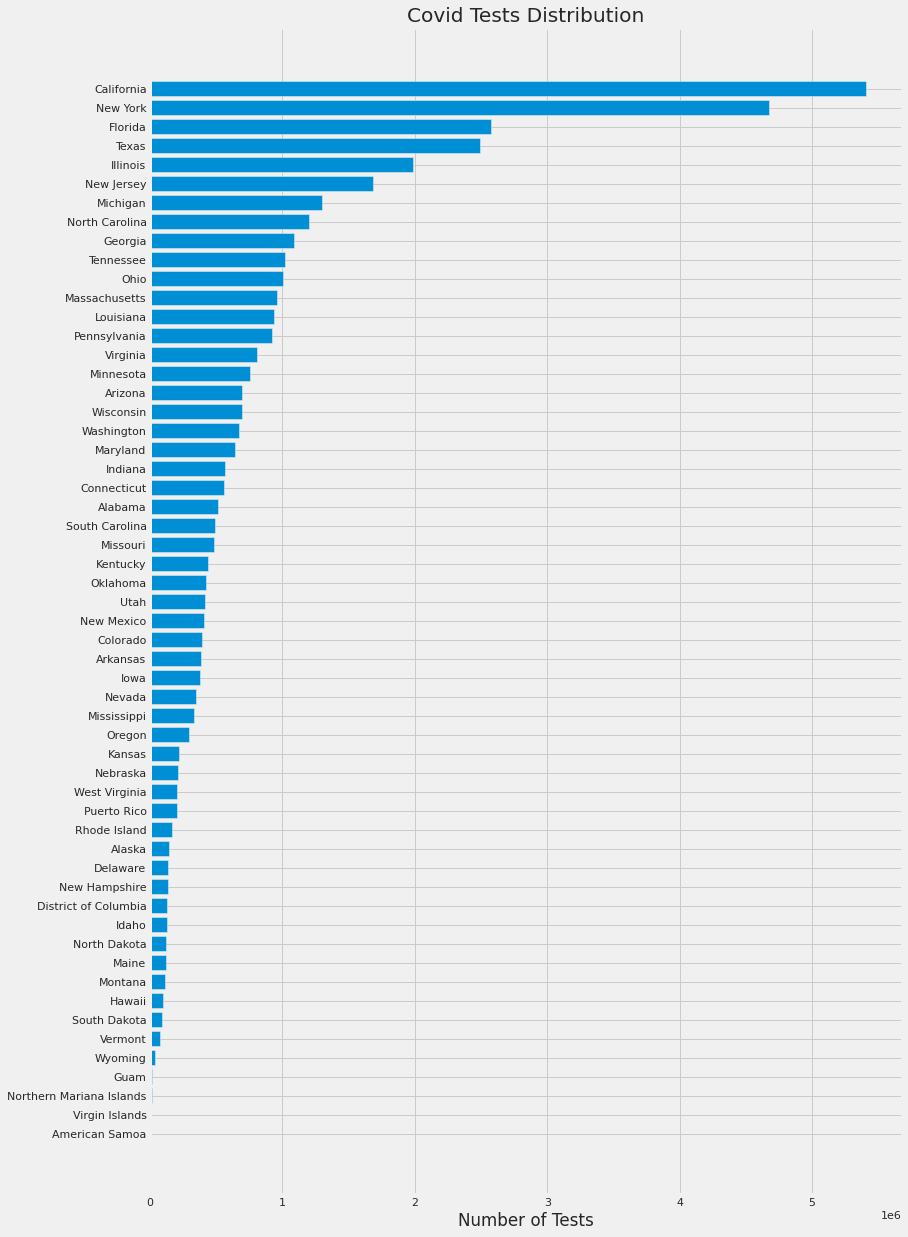

In [134]:
# Plotting People Tested
figsize(12, 20)

# Bar chart of People Tested 
plt.style.use('fivethirtyeight')
Xy = us_cases[['Province_State', 'People_Tested']].copy()

Xy.sort_values(by = 'People_Tested', na_position='first', ascending = True, inplace = True)
plt.barh(Xy['Province_State'], Xy['People_Tested'] )
plt.xlabel('Number of Tests') 
plt.title('Covid Tests Distribution')

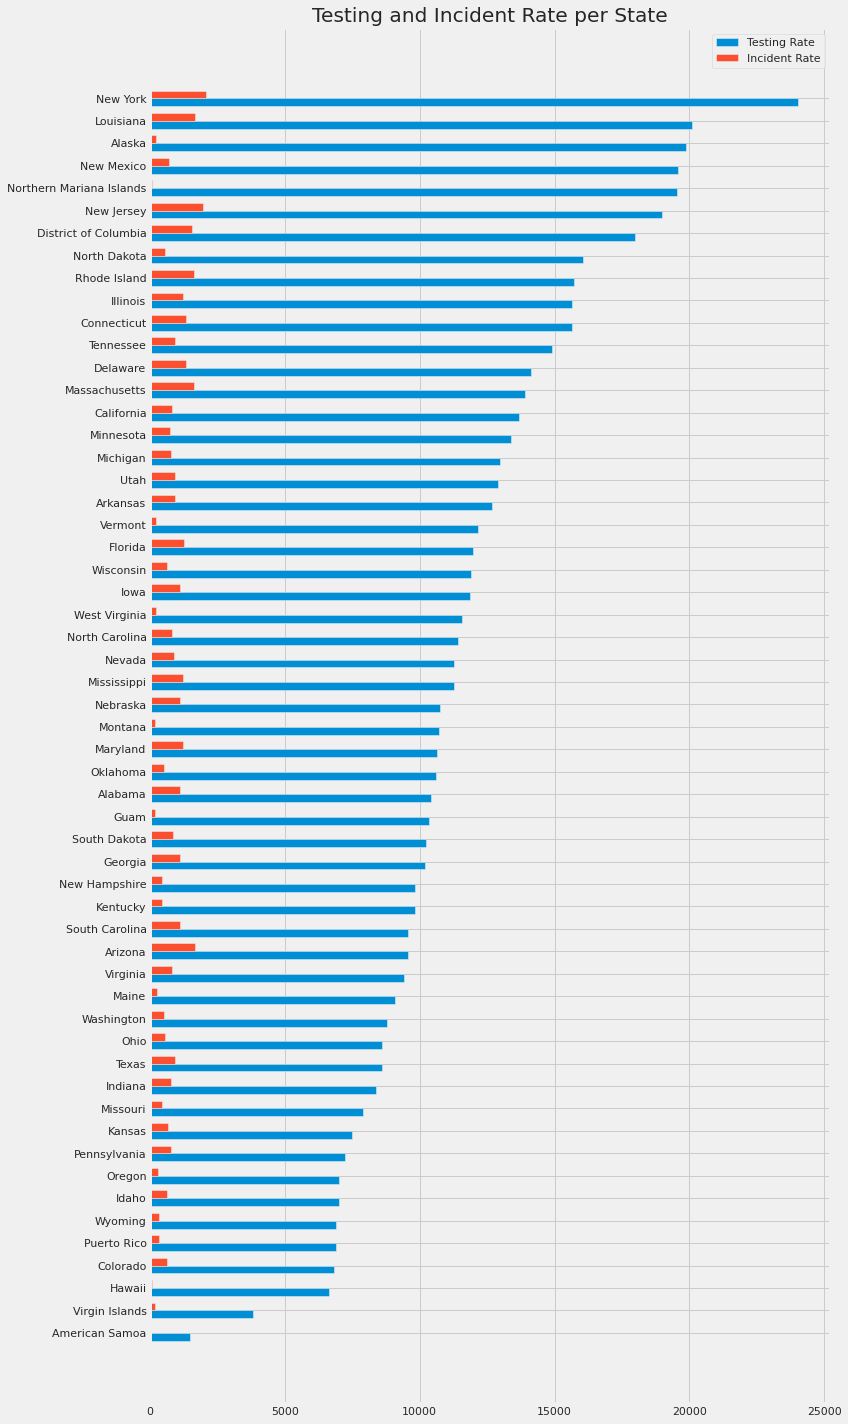

In [135]:
# Plotting incident rate and Testing rate per 100,000
figsize(12, 20)

# Bar chart of Covid Incident and Testing Rates 
plt.style.use('fivethirtyeight')
Xy = us_cases[['Province_State', 'Incident_Rate', 'Testing_Rate']].copy()

Xy.sort_values(by = 'Testing_Rate', na_position='first', ascending = True, inplace = True)
Xy.dropna(inplace = True)

labels = Xy['Province_State']
testing_rate = Xy['Testing_Rate']
incident_rate = Xy['Incident_Rate']

y = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.barh(y - width/2, testing_rate, width, label='Testing Rate')
rects2 = ax.barh(y + width/2, incident_rate, width, label='Incident Rate')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_title('Testing and Incident Rate per State')
ax.set_yticks(y)
ax.set_yticklabels(labels)
ax.legend()

fig.tight_layout()

plt.show()


#  Creating New Features from existing data

New York has the best Covid 19 testing rates in America. But we need to look at one more metric that's not available right away in our source data to determine if New York is truly the leader in testing. That's Test Postivity Rate i.e. percentage of positive cases / number of tests conducted. Let's calculate that metric from our available data elements as per below  

*  Test Postivity Rate = confirmed cases / Total Test conducted

In [136]:
us_cases['TPR'] = us_cases['Confirmed']/ us_cases['People_Tested']
us_cases.head()

,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Testing_Rate,Hospitalization_Rate,TPR
0,Alabama,US,2020-07-13 04:43:16,32.3182,-86.9023,53587,1121,25783.0,26683.0,1,1092.901859,511506.0,6745.0,2.091925,84000001,USA,10432.117083,12.587008,0.104763
1,Alaska,US,2020-07-13 04:43:16,61.3707,-152.4044,1479,17,615.0,847.0,2,202.174849,145475.0,NaN,1.149425,84000002,USA,19885.994710,NaN,0.010167
2,American Samoa,US,2020-07-13 04:43:16,-14.2710,-170.1320,0,0,NaN,0.0,60,0.000000,816.0,NaN,NaN,16,ASM,1466.544455,NaN,0.000000
3,Arizona,US,2020-07-13 04:43:16,33.7298,-111.4312,122467,2237,14829.0,105401.0,4,1682.535535,696172.0,5795.0,1.826615,84000004,USA,9564.487807,4.731887,0.175915
4,Arkansas,US,2020-07-13 04:43:16,34.9697,-92.3731,28367,321,21591.0,6455.0,5,939.988150,382402.0,1822.0,1.131597,84000005,USA,12671.532015,6.422956,0.074181


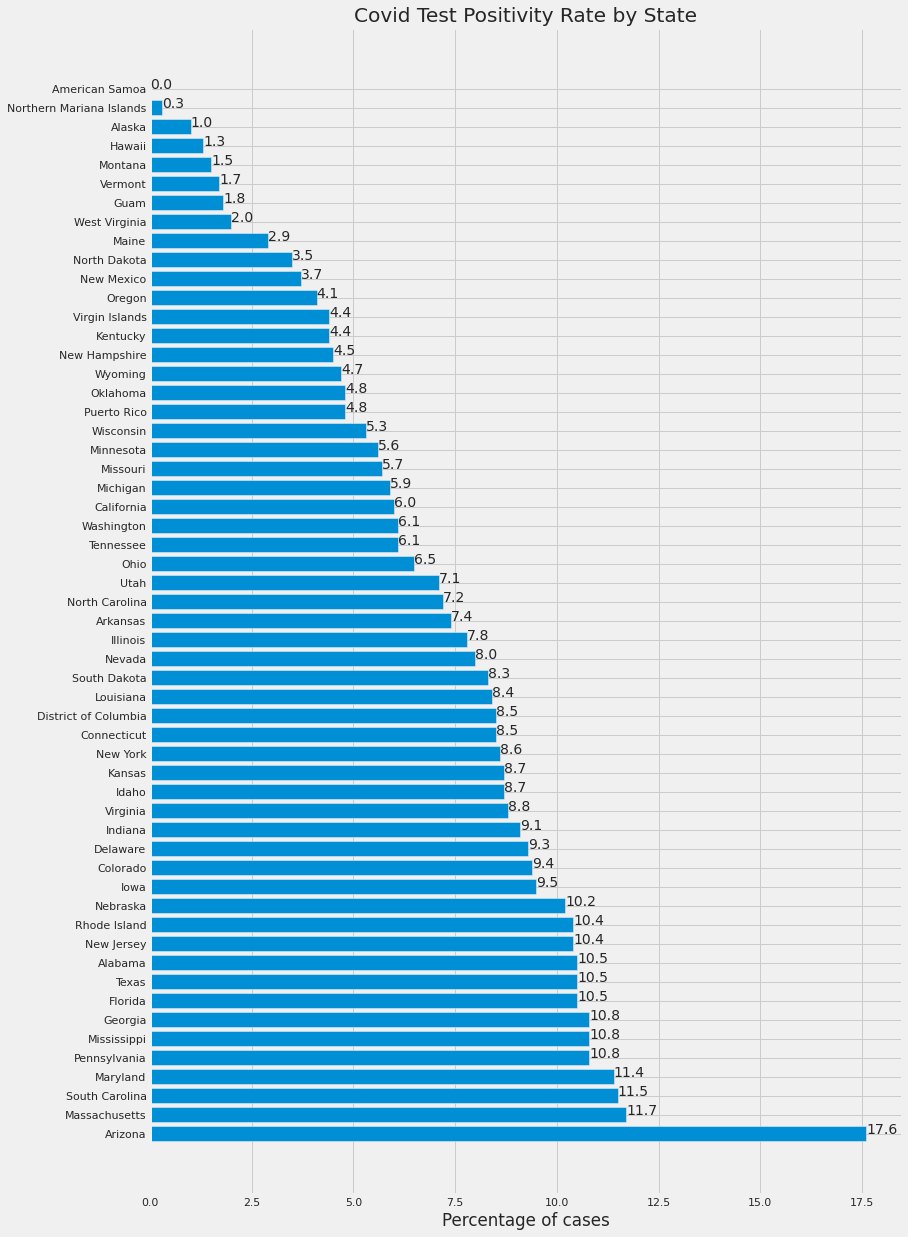

In [137]:
# Plotting test positivity rate across states
figsize(12, 20)

# Bar chart of Covid TPR 
plt.style.use('fivethirtyeight')
Xy = us_cases[['Province_State', 'TPR']].copy()

Xy['TPR'] = round(Xy['TPR']*100, 1)

Xy.sort_values(by = 'TPR', na_position='first', ascending = False, inplace = True)
plt.barh(Xy['Province_State'], Xy['TPR'] )
plt.xlabel('Percentage of cases') 
plt.title('Covid Test Positivity Rate by State')

for index, value in enumerate(Xy['TPR']):
    plt.text(value, index, str(value))

As is evident in the above graph, though number of tests conducted in New York is quite high, but their test positivity rate is also high which generally implies that testing has to be expanded to ensure most of the covid cases are identified.   

Arizona fares worst in TPR metric which means the state is doing quite poorly on testing

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


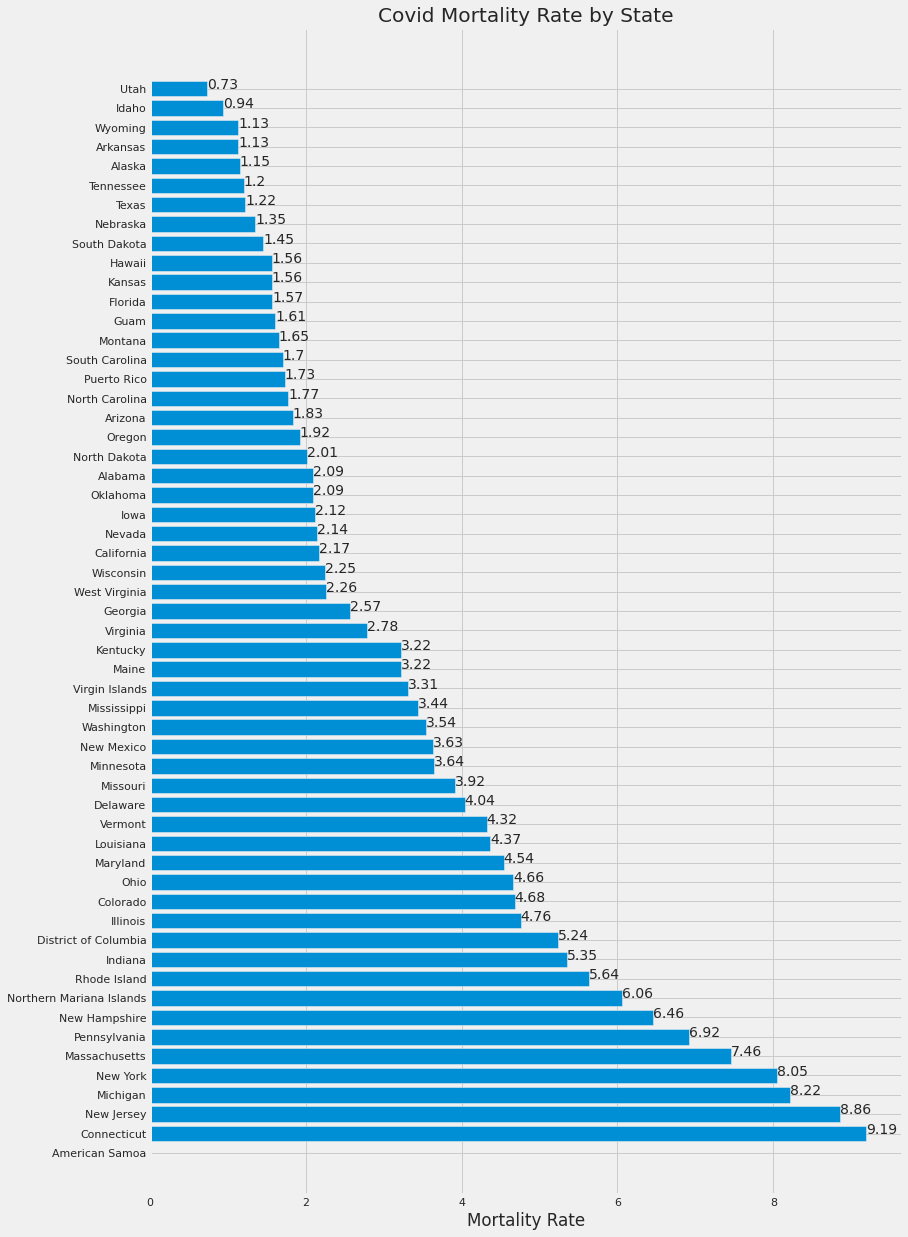

In [138]:
# Plotting mortality rate

figsize(12, 20)

# Bar chart of Covid Mortality Rate 
plt.style.use('fivethirtyeight')
Xy = us_cases[['Province_State', 'Mortality_Rate']].copy()
Xy.dropna()

Xy['Mortality_Rate'] = round(Xy['Mortality_Rate'], 2)
Xy.sort_values(by = 'Mortality_Rate', na_position='first', ascending = False, inplace = True)
plt.barh(Xy['Province_State'], Xy['Mortality_Rate'] )
plt.xlabel('Mortality Rate') 
plt.title('Covid Mortality Rate by State')

for index, value in enumerate(Xy['Mortality_Rate']):
    plt.text(value, index, str(value))

Let's look at what other parameters we can calculate from the existing data

In [139]:
# Let's calculate population of each state
us_cases['Population'] = us_cases['People_Tested']/us_cases['Testing_Rate']*10000
us_cases.head()

,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Testing_Rate,Hospitalization_Rate,TPR,Population
0,Alabama,US,2020-07-13 04:43:16,32.3182,-86.9023,53587,1121,25783.0,26683.0,1,1092.901859,511506.0,6745.0,2.091925,84000001,USA,10432.117083,12.587008,0.104763,490318.5
1,Alaska,US,2020-07-13 04:43:16,61.3707,-152.4044,1479,17,615.0,847.0,2,202.174849,145475.0,NaN,1.149425,84000002,USA,19885.994710,NaN,0.010167,73154.5
2,American Samoa,US,2020-07-13 04:43:16,-14.2710,-170.1320,0,0,NaN,0.0,60,0.000000,816.0,NaN,NaN,16,ASM,1466.544455,NaN,0.000000,5564.1
3,Arizona,US,2020-07-13 04:43:16,33.7298,-111.4312,122467,2237,14829.0,105401.0,4,1682.535535,696172.0,5795.0,1.826615,84000004,USA,9564.487807,4.731887,0.175915,727871.7
4,Arkansas,US,2020-07-13 04:43:16,34.9697,-92.3731,28367,321,21591.0,6455.0,5,939.988150,382402.0,1822.0,1.131597,84000005,USA,12671.532015,6.422956,0.074181,301780.4


Verifying if our population count is correct
*  Alabama - Calculated : 490318.5, Actual 49.0 lk
*  Arizona - Calculated : 727871.7, Actual 72.8 lk

Now that we have population data available, let's look at Covid distribution using population as a metric

In [140]:
us_cases['deaths_per_100k'] = us_cases['Deaths'] / us_cases['Population'] * 100000
us_cases.head()

,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Testing_Rate,Hospitalization_Rate,TPR,Population,deaths_per_100k
0,Alabama,US,2020-07-13 04:43:16,32.3182,-86.9023,53587,1121,25783.0,26683.0,1,1092.901859,511506.0,6745.0,2.091925,84000001,USA,10432.117083,12.587008,0.104763,490318.5,228.626903
1,Alaska,US,2020-07-13 04:43:16,61.3707,-152.4044,1479,17,615.0,847.0,2,202.174849,145475.0,NaN,1.149425,84000002,USA,19885.994710,NaN,0.010167,73154.5,23.238488
2,American Samoa,US,2020-07-13 04:43:16,-14.2710,-170.1320,0,0,NaN,0.0,60,0.000000,816.0,NaN,NaN,16,ASM,1466.544455,NaN,0.000000,5564.1,0.000000
3,Arizona,US,2020-07-13 04:43:16,33.7298,-111.4312,122467,2237,14829.0,105401.0,4,1682.535535,696172.0,5795.0,1.826615,84000004,USA,9564.487807,4.731887,0.175915,727871.7,307.334383
4,Arkansas,US,2020-07-13 04:43:16,34.9697,-92.3731,28367,321,21591.0,6455.0,5,939.988150,382402.0,1822.0,1.131597,84000005,USA,12671.532015,6.422956,0.074181,301780.4,106.368737


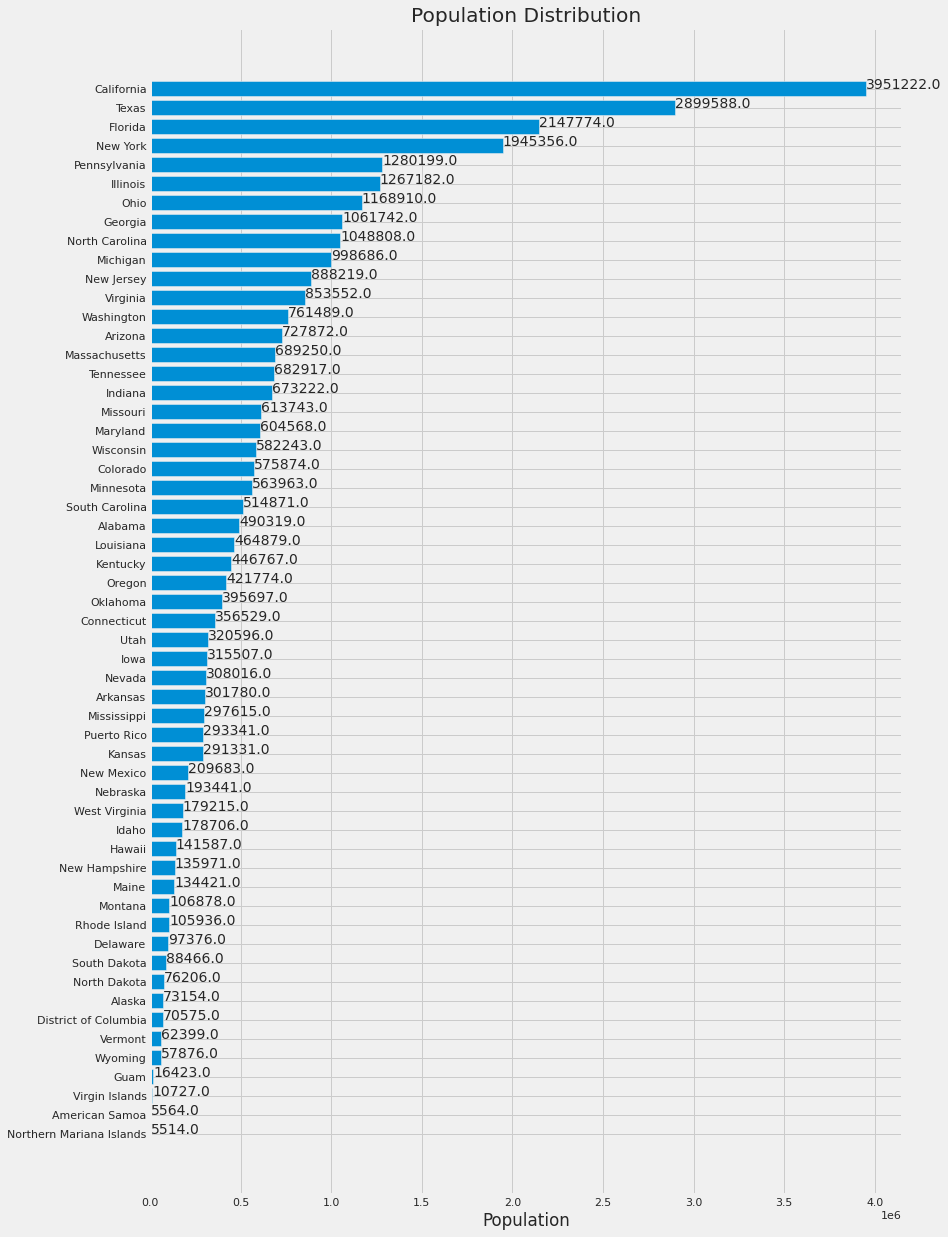

In [141]:
# Plotting population
figsize(12, 20)

# Bar chart of Population 
plt.style.use('fivethirtyeight')
Xy = us_cases[['Province_State', 'Population']].copy()
Xy.dropna()

Xy['Population'] = round(Xy['Population'])

Xy.sort_values(by = 'Population', na_position='first', ascending = True, inplace = True)
plt.barh(Xy['Province_State'], Xy['Population'] )
plt.xlabel('Population') 
plt.title('Population Distribution')

for index, value in enumerate(Xy['Population']):
    plt.text(value, index, str(value))

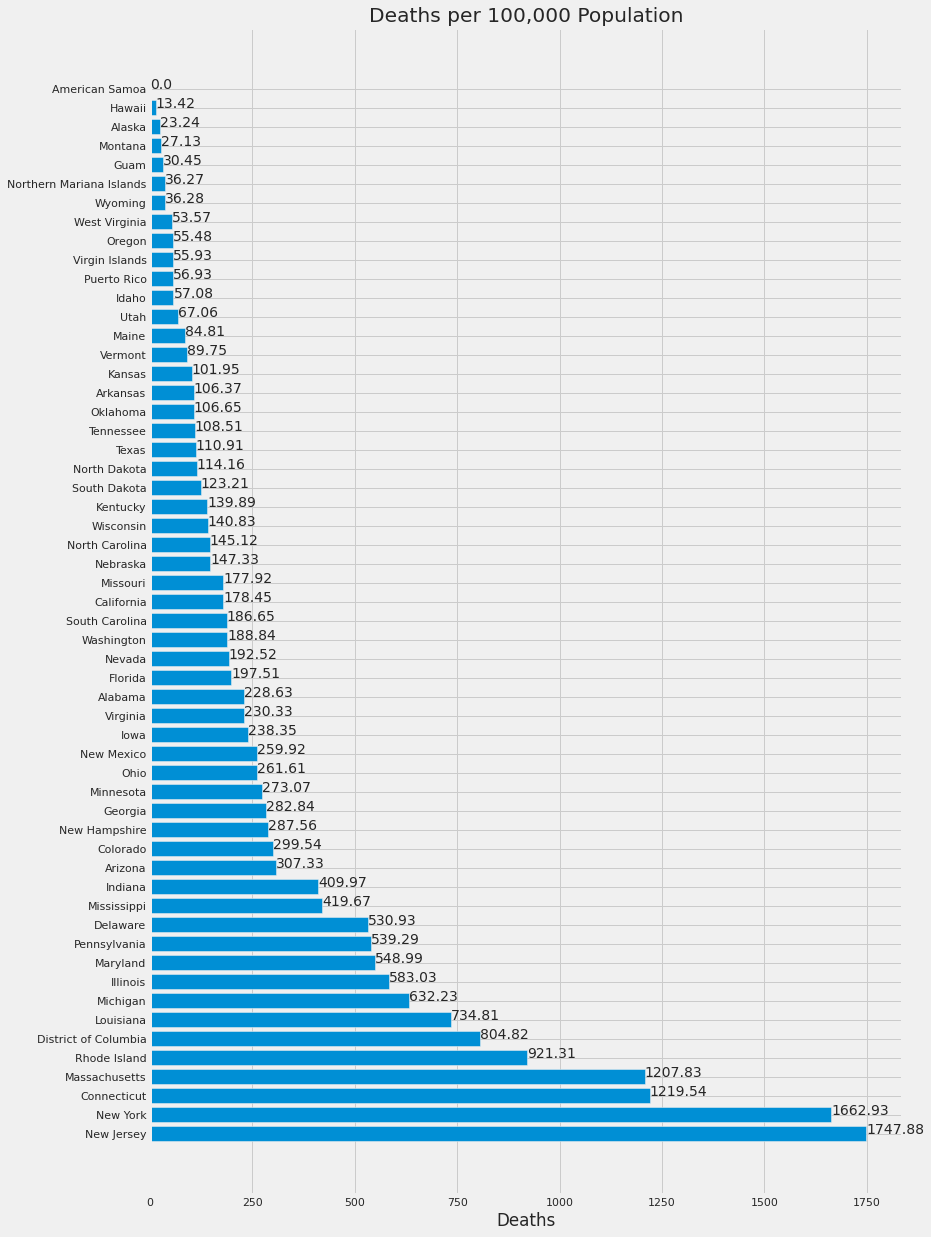

In [142]:
# Plotting mortality rate / 100k population

figsize(12, 20)

# Bar chart of Covid Deaths per 100,000
plt.style.use('fivethirtyeight')
Xy = us_cases[['Province_State', 'deaths_per_100k']].copy()
Xy.dropna()

Xy['deaths_per_100k'] = round(Xy['deaths_per_100k'], 2)
Xy.sort_values(by = 'deaths_per_100k', na_position='first', ascending = False, inplace = True)
plt.barh(Xy['Province_State'], Xy['deaths_per_100k'] )
plt.xlabel('Deaths') 
plt.title('Deaths per 100,000 Population')

for index, value in enumerate(Xy['deaths_per_100k']):
    plt.text(value, index, str(value))

In [143]:
# Let's look at some possible correlations between data elements.
# First let's remove data elements we know are not relevant to find correlations

confirmed_cases = us_cases.drop(labels=['Last_Update',	'Lat'	,'Long_', 'FIPS', 'UID', 'ISO3'], axis=1)
# Find all correlations and sort 
correlations_data = confirmed_cases.corr()['Confirmed'].sort_values()

# Print the most negative correlations
print('Most negative Correlations')
print(correlations_data.head(7), '\n')

# Print the most positive correlations
print('Most positive Correlations')
print(correlations_data.tail(7))

Most negative Correlations
Mortality_Rate          0.231558
Testing_Rate            0.320587
Hospitalization_Rate    0.335252
TPR                     0.418680
deaths_per_100k         0.472945
Incident_Rate           0.551458
Recovered               0.743483
Name: Confirmed, dtype: float64 

Most positive Correlations
Recovered              0.743483
Deaths                 0.784097
Population             0.893830
People_Hospitalized    0.896890
Active                 0.941380
People_Tested          0.954334
Confirmed              1.000000
Name: Confirmed, dtype: float64


/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:1259: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(UserWarning(msg))


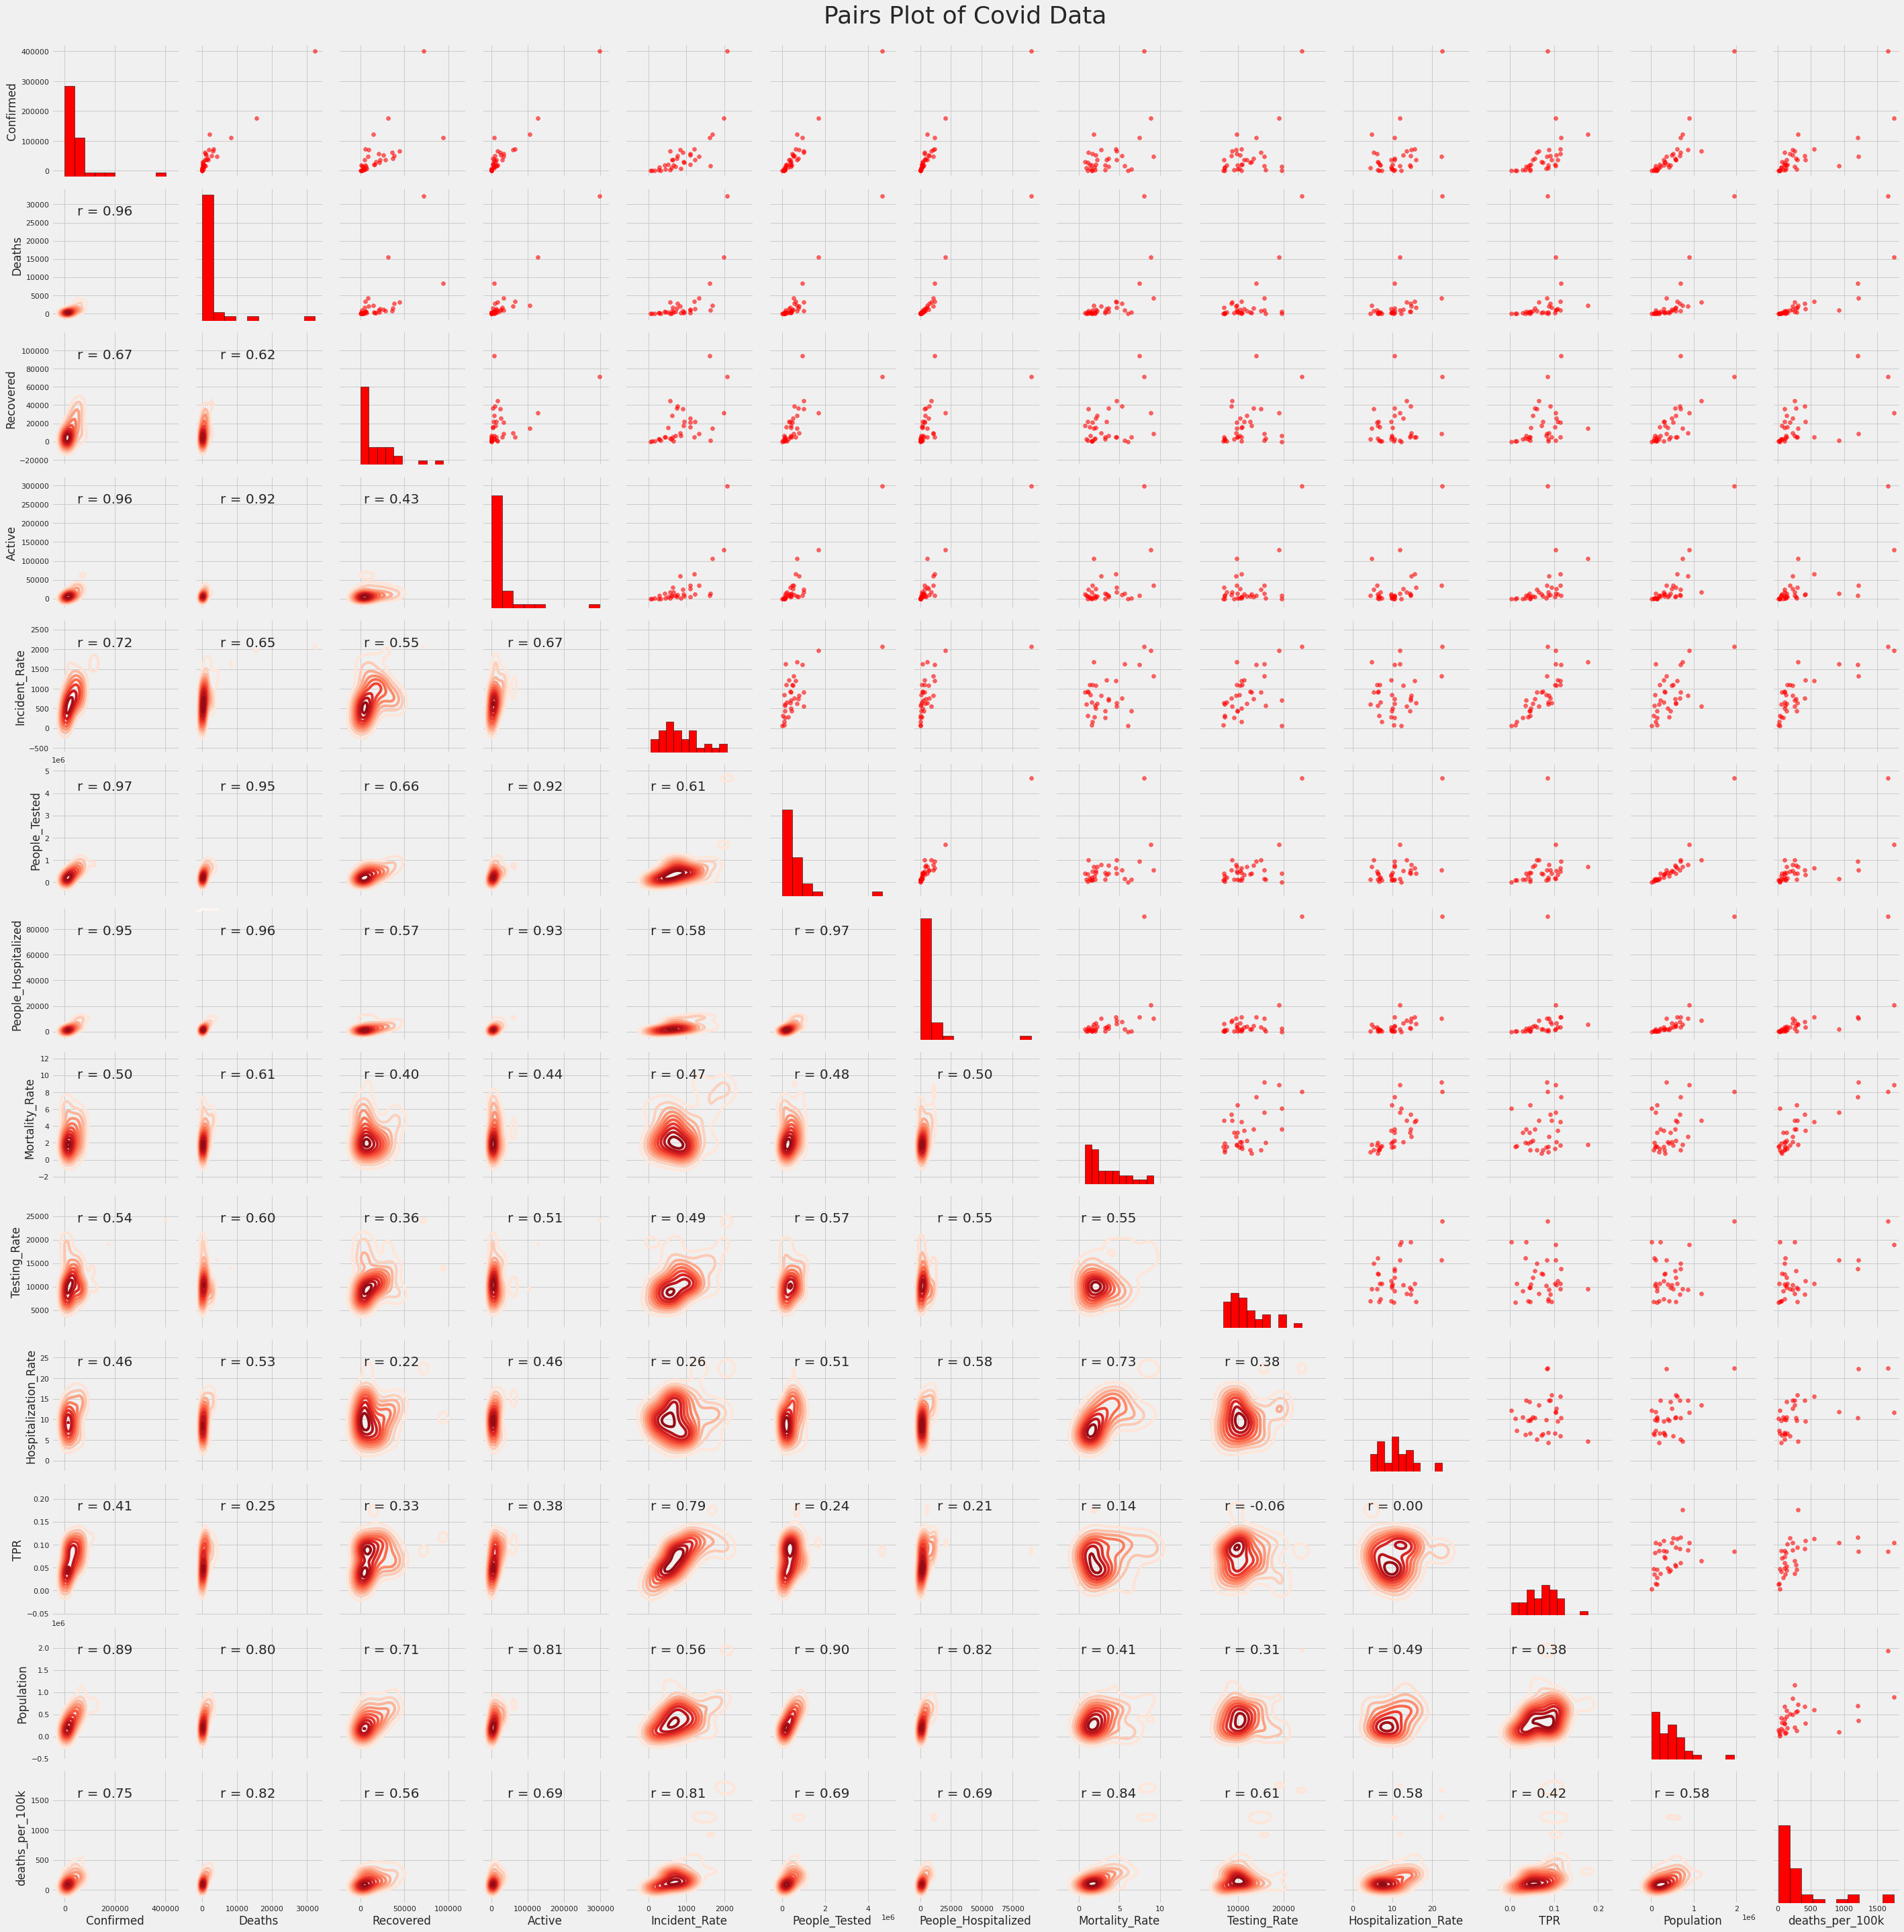

In [144]:
# Extract the columns to  plot
plot_data = confirmed_cases


# Drop na values
plot_data = plot_data.dropna()

# Function to calculate correlation coefficient between two columns
def corr_func(x, y, **kwargs):
    r = np.corrcoef(x, y)[0][1]
    ax = plt.gca()
    ax.annotate("r = {:.2f}".format(r),
                xy=(.2, .8), xycoords=ax.transAxes,
                size = 20)

# Create the pairgrid object
grid = sns.PairGrid(data = plot_data, size = 3)

# Upper is a scatter plot
grid.map_upper(plt.scatter, color = 'red', alpha = 0.6)

# Diagonal is a histogram
grid.map_diag(plt.hist, color = 'red', edgecolor = 'black')

# Bottom is correlation and density plot
grid.map_lower(corr_func);
grid.map_lower(sns.kdeplot, cmap = plt.cm.Reds)

# Title for entire plot
plt.suptitle('Pairs Plot of Covid Data', size = 36, y = 1.02);


The general trend observed from the analysis of the data for covig-19 infection visually was that states with higher population like New York, California, Texas were heavily affected.  

This is corroborated by the correlation graph plotted above.  

It will be interesting to look at population density, remedial measures taken by govt like social distancing, lockdown, hospital facilities etc. on the Covid-19 incident rate and mortality rate